In [1]:
import pandas as pd
# Data Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Classificaon
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC

# Utils
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.utils.class_weight import compute_class_weight

In [2]:
def plot_correlation_matrix(dataframe, plot_graph=True, return_matrix=False):
    """
    Calculates and optionally plots the correlation matrix of a given DataFrame.
    
    Parameters:
    - dataframe: DataFrame from which to calculate the correlation matrix.
    - plot_graph: If True, displays a heatmap of the correlation matrix.
    - return_matrix: If True, returns the correlation matrix.
    
    Returns:
    - If return_matrix is True, returns the correlation matrix of the dataframe.
    """
    # Calculate the correlation matrix
    correlation_matrix = dataframe.corr('spearman')
    
    # Plot the correlation matrix heatmap if requested
    if plot_graph:
        plt.figure(figsize=(25, 20))
        sns.heatmap(correlation_matrix, vmin=-1, vmax=1, center=0, cmap="hot", annot=True, fmt=".2f", square=True)
        plt.xticks(rotation=45, horizontalalignment='right')
    
    # Return the correlation matrix if requested
    if return_matrix:
        return correlation_matrix

In [3]:
def plot_confusion_matrix(y_true, y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap.

    Parameters:
    - y_true: array-like of shape (n_samples,), True labels of the data.
    - y_pred: array-like of shape (n_samples,), Predicted labels.

    Returns:
    - None, displays a confusion matrix.
    """
    # Compute confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a DataFrame for Seaborn's heatmap
    confusion_df = pd.DataFrame(confusion_mat, index=['Real Negative', 'Real Positive'], columns=['Predicted Negative', 'Predicted Positive'])
    
    # Plotting the heatmap
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_df, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ClasificadorClientesTelecom/refs/heads/master/Datos/churn_telecom_espa%C3%B1ol.csv')

In [5]:
df

,Estado,Dias de antiguedad,Codigo Postal,Plan Internacional,Plan Correo de voz,Total Correos de Voz,Minutos Dia,Llamadas Dia,Cargos Dia,Minutos Tarde,Llamadas Tarde,Cargos Tarde,Minutos Noche,Llamadas Noche,Cargos Noche,Minutos Internacional,Llamadas Internacional,Cargos Internacional,Llamadas Servicio al Cliente,Abandono
0,KS,128,415,No,Si,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Si,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Si,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Si,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114,415,No,Si,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3329,AL,106,408,No,Si,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Estado                        3333 non-null   object 
 1   Dias de antiguedad            3333 non-null   int64  
 2   Codigo Postal                 3333 non-null   int64  
 3   Plan Internacional            3333 non-null   object 
 4   Plan Correo de voz            3333 non-null   object 
 5   Total Correos de Voz          3333 non-null   int64  
 6   Minutos Dia                   3333 non-null   float64
 7   Llamadas Dia                  3333 non-null   int64  
 8   Cargos Dia                    3333 non-null   float64
 9   Minutos Tarde                 3333 non-null   float64
 10  Llamadas Tarde                3333 non-null   int64  
 11  Cargos Tarde                  3333 non-null   float64
 12  Minutos Noche                 3333 non-null   float64
 13  Lla

In [7]:
data = df.copy(deep=True)

In [8]:
data = data.drop('Estado', axis=1)

In [9]:
data

,Dias de antiguedad,Codigo Postal,Plan Internacional,Plan Correo de voz,Total Correos de Voz,Minutos Dia,Llamadas Dia,Cargos Dia,Minutos Tarde,Llamadas Tarde,Cargos Tarde,Minutos Noche,Llamadas Noche,Cargos Noche,Minutos Internacional,Llamadas Internacional,Cargos Internacional,Llamadas Servicio al Cliente,Abandono
0,128,415,No,Si,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,No,Si,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,Si,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,Si,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,114,415,No,Si,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3329,106,408,No,Si,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3330,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3331,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [10]:
data['Plan Internacional'] = data['Plan Internacional'].map({'Si': 1, 'No': 0})
data["Plan Correo de voz"] = data['Plan Correo de voz'].map({"Si": 1, "No": 0})

In [11]:
data

,Dias de antiguedad,Codigo Postal,Plan Internacional,Plan Correo de voz,Total Correos de Voz,Minutos Dia,Llamadas Dia,Cargos Dia,Minutos Tarde,Llamadas Tarde,Cargos Tarde,Minutos Noche,Llamadas Noche,Cargos Noche,Minutos Internacional,Llamadas Internacional,Cargos Internacional,Llamadas Servicio al Cliente,Abandono
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3329,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3330,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3331,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


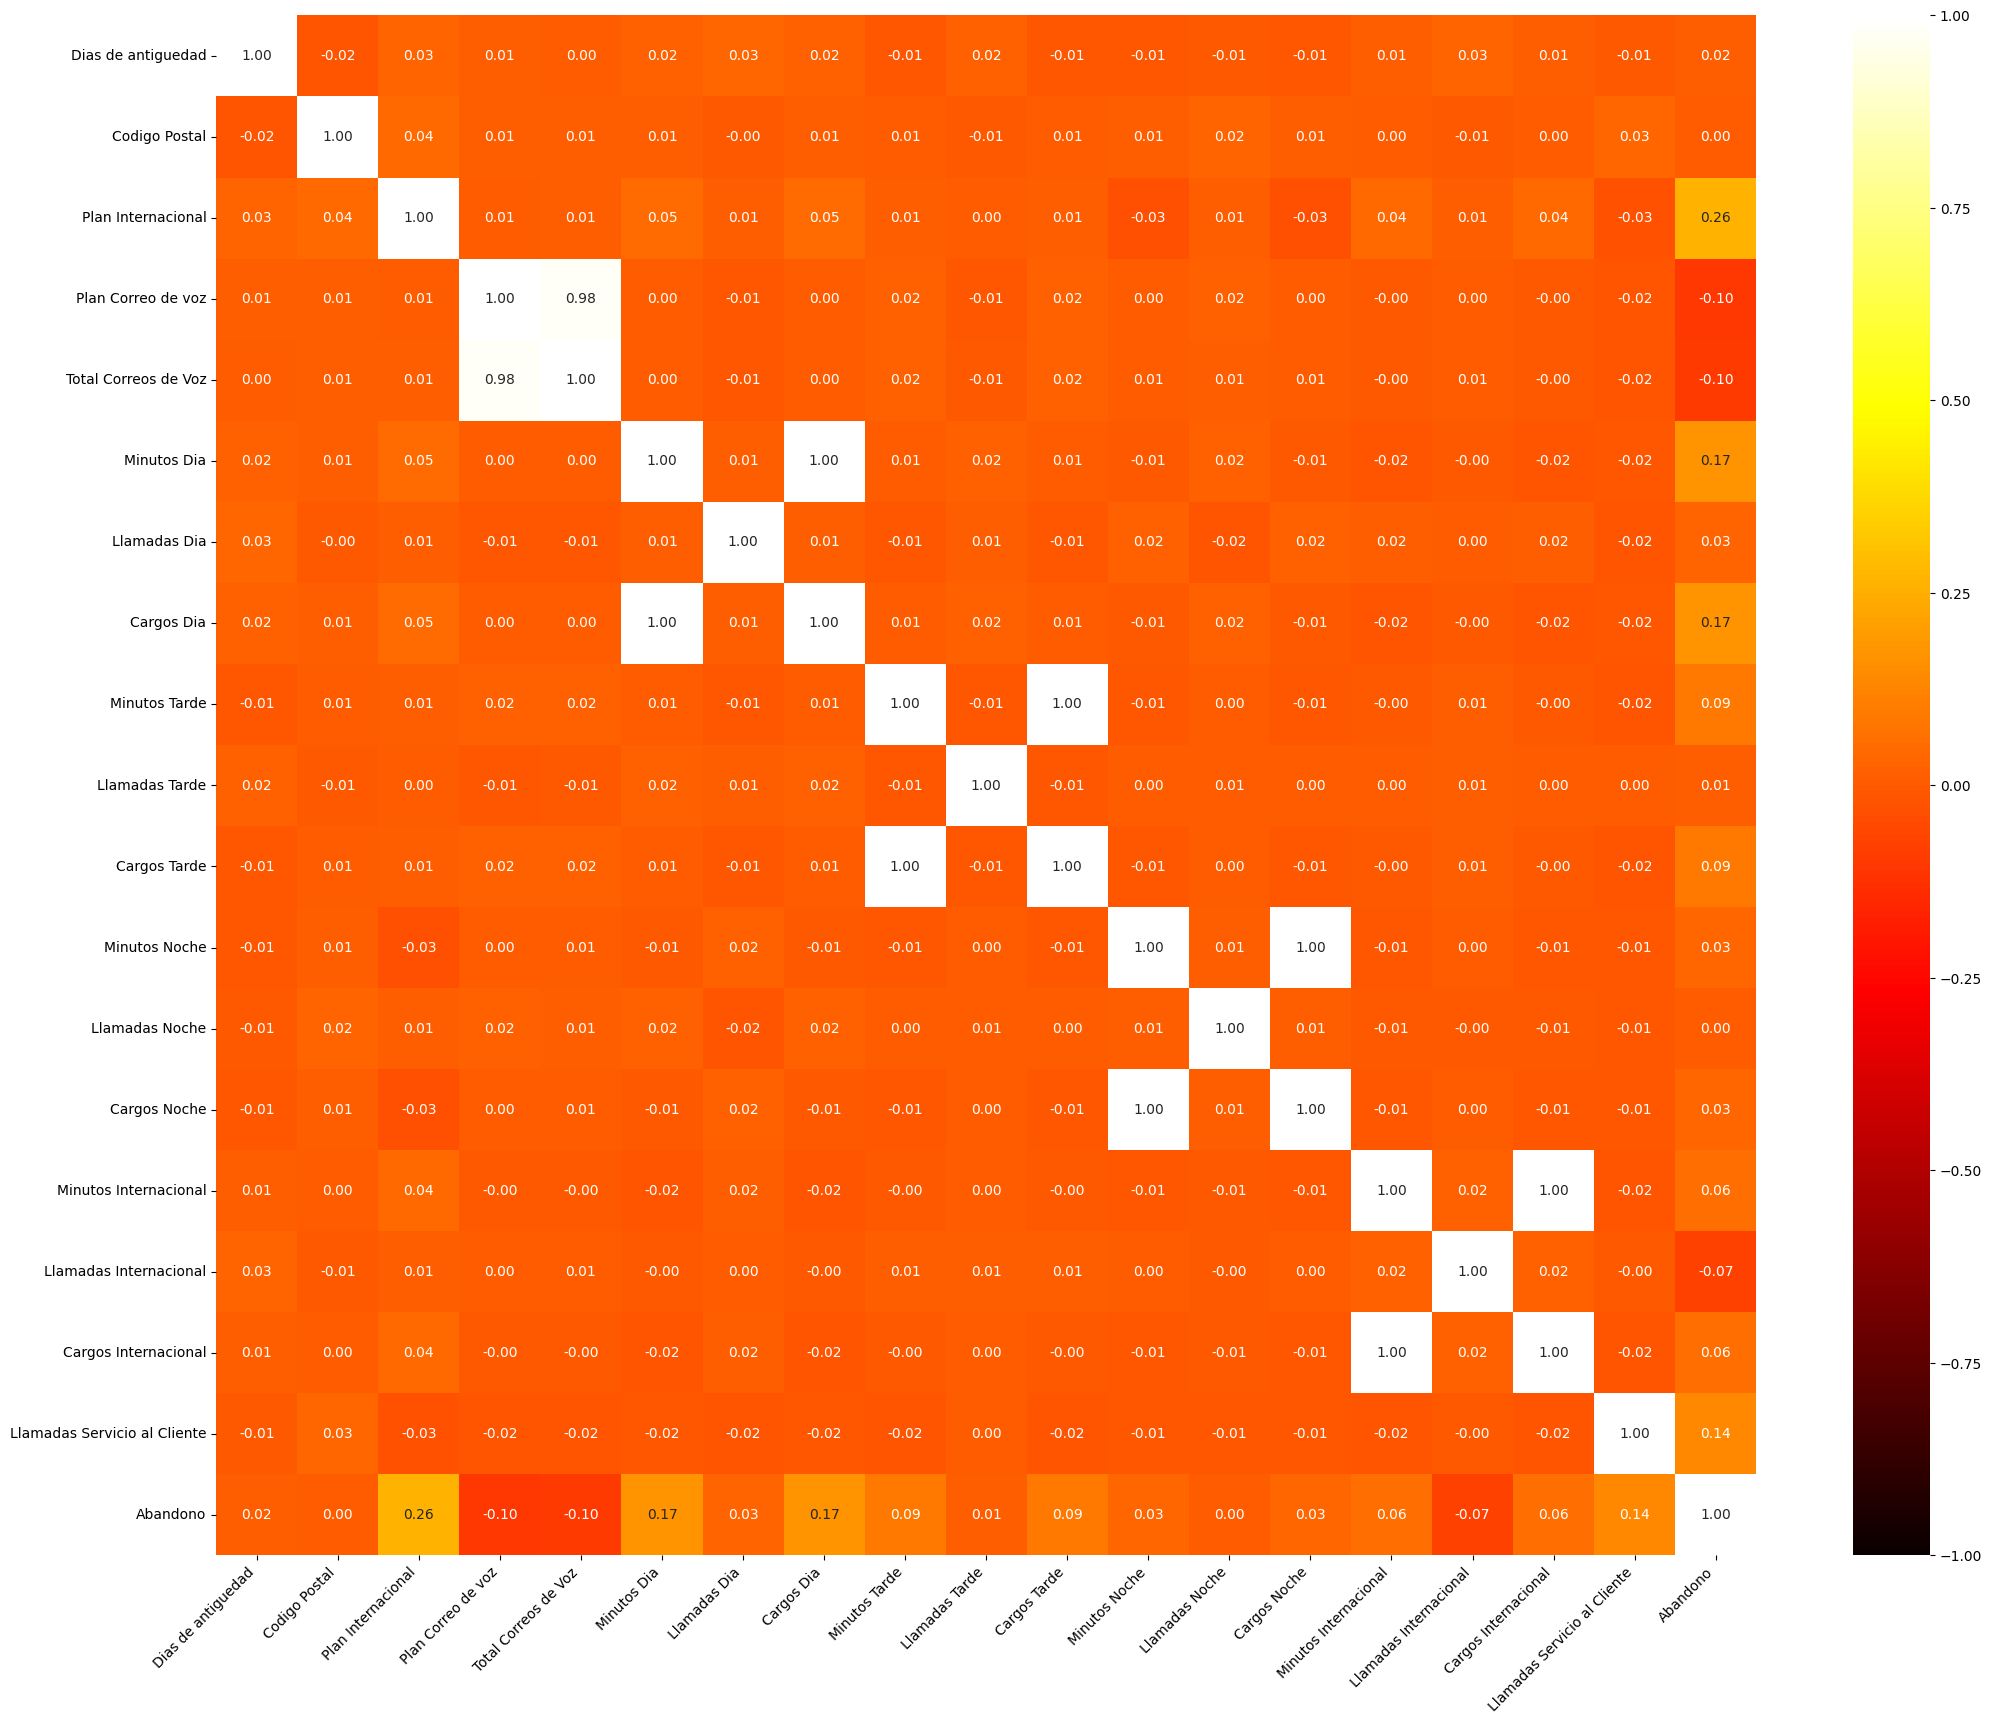

In [12]:
plot_correlation_matrix(data)

In [13]:
data = data.drop(columns=['Minutos Internacional', 'Minutos Noche', 'Minutos Tarde', 'Minutos Dia'])

In [14]:
data

,Dias de antiguedad,Codigo Postal,Plan Internacional,Plan Correo de voz,Total Correos de Voz,Llamadas Dia,Cargos Dia,Llamadas Tarde,Cargos Tarde,Llamadas Noche,Cargos Noche,Llamadas Internacional,Cargos Internacional,Llamadas Servicio al Cliente,Abandono
0,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,114,415,0,1,26,88,23.31,125,13.23,94,11.14,7,3.11,2,False
3329,106,408,0,1,29,131,14.21,131,17.33,73,10.33,3,2.19,1,False
3330,60,415,0,0,0,118,32.96,110,7.23,134,9.45,8,3.56,3,False
3331,159,415,0,0,0,114,28.87,105,16.80,82,8.72,4,3.13,1,False


In [15]:
X = data.drop(columns=['Abandono'])
y = data['Abandono']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [17]:
# imprime los conjuntos de entrenamiento y prueba
print("TRAINING SET")
print("X: ", X_train.shape)
print("y: ", y_train.shape)
print('Fraude:{:7.3f}%'.format(y_train.mean()*100),'\n')

print("TEST SET")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
print('Fraude:{:7.3f}%'.format(y_test.mean()*100))

TRAINING SET
X:  (2666, 14)
y:  (2666,)
Fraude: 14.554% 

TEST SET
X:  (667, 14)
y:  (667,)
Fraude: 14.243%


In [18]:
model = Perceptron(verbose=True)

In [20]:
model.fit(X_train, y_train)    

-- Epoch 1
Norm: 1779.27, NNZs: 14, Bias: -4.000000, T: 2666, Avg. loss: 30041.848702
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2873.08, NNZs: 14, Bias: -8.000000, T: 5332, Avg. loss: 28184.233466
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3204.56, NNZs: 14, Bias: -13.000000, T: 7998, Avg. loss: 27634.417870
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3968.61, NNZs: 14, Bias: -18.000000, T: 10664, Avg. loss: 28914.327145
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4229.26, NNZs: 14, Bias: -24.000000, T: 13330, Avg. loss: 27327.291035
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4562.98, NNZs: 14, Bias: -29.000000, T: 15996, Avg. loss: 27591.386880
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4925.96, NNZs: 14, Bias: -33.000000, T: 18662, Avg. loss: 26686.231828
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 4998.24, NNZs: 14, Bias: -37.000000, T: 21328, Avg. loss: 28448.947205
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5477

Perceptron(verbose=True)

In [21]:
y_pred = model.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.13      0.23       572
        True       0.15      0.93      0.26        95

    accuracy                           0.25       667
   macro avg       0.53      0.53      0.25       667
weighted avg       0.81      0.25      0.24       667



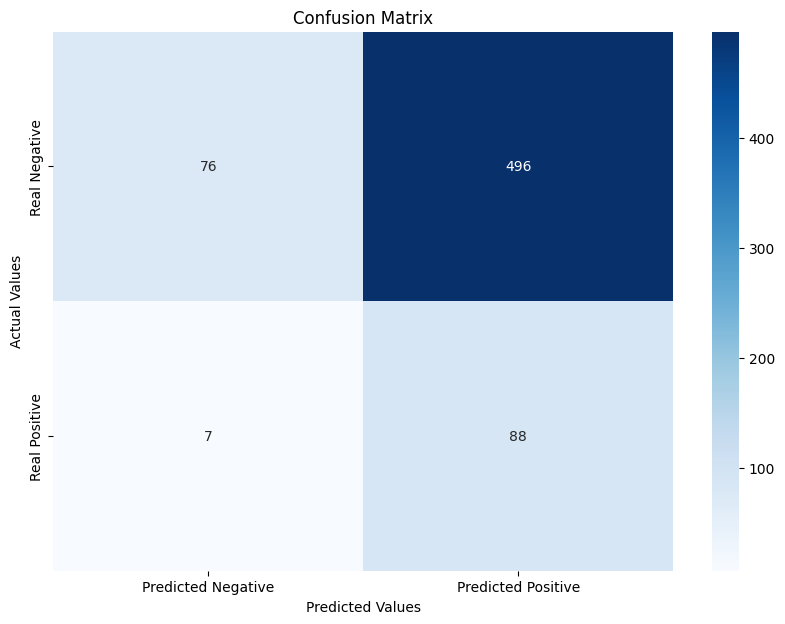

In [23]:
plot_confusion_matrix(y_test, y_pred)